In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load iris dataset as an example
df=pd.read_csv('./dataset_augmented_all.csv')
df

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,atomic_number,radius_pm,oxid_state,relativistic,metal_amount_mmol,num of group,spcaer,...,aromaticity1,sol1_vol_mL,protic2,polarity index 2,aromaticity2,solv2_vol_mL,time_min,temp_c,size_nm,g_factor*10^4
0,0,0,0,0.90070,-0.626518,0.980887,0.900450,-0.454943,-0.280991,-0.526910,...,-0.070711,-0.124583,-0.537086,-0.793018,-0.240613,-0.523310,0.680663,-0.997007,3.060000,0.000000
1,1,1,1,0.90070,-0.626518,0.980887,0.900450,-0.454943,-0.280991,-0.526910,...,-0.070711,-0.104117,-0.537086,-0.793018,-0.240613,-0.523310,0.680663,-0.997007,1.000000,0.757989
2,2,2,2,-1.03686,-0.252283,-0.853143,-1.110555,1.601355,0.049297,-0.526910,...,-0.070711,-0.175747,-0.537086,-0.793018,-0.240613,-0.523310,-0.593509,-0.997007,1.000000,0.583069
3,3,3,3,-1.03686,-0.252283,-0.853143,-1.110555,1.768534,-0.280991,-0.526910,...,-0.070711,-0.032487,-0.537086,-0.793018,-0.240613,-0.523310,-0.593509,-0.997007,2.370000,0.000000
4,4,4,4,0.90070,-0.626518,0.980887,0.900450,-0.454943,0.049297,-0.526910,...,-0.070711,-0.124583,-0.537086,-0.793018,-0.240613,-0.523310,0.680663,-0.997007,4.000000,15.151515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,196,196,196,-1.03686,-0.252283,-0.853143,-1.110555,-0.265474,-0.115847,-0.742392,...,-0.070711,-0.605526,-0.537086,-0.793018,-0.240613,-0.523310,0.217328,-0.176375,2.066667,2.000000
197,197,197,197,-1.03686,-0.252283,-0.853143,-1.110555,0.570420,-0.115847,-0.526910,...,-0.070711,-0.175747,1.861899,1.679991,-0.240613,-0.004855,-0.535592,-0.176375,1.050000,15.000000
198,198,198,198,-1.03686,-0.252283,-0.853143,-1.110555,0.570420,-0.115847,-0.526910,...,-0.070711,-0.175747,1.861899,1.679991,-0.240613,-0.004855,-0.535592,-0.176375,1.300000,10.000000
199,199,199,199,-1.03686,-0.252283,-0.853143,-1.110555,0.570420,-0.115847,-0.526910,...,-0.070711,-0.175747,1.861899,1.679991,-0.240613,-0.004855,-0.535592,-0.176375,1.050000,7.000000


In [3]:

input_col=[col for col in df.columns]
input_col.remove('Unnamed: 0')
input_col.remove('Unnamed: 0.1')
input_col.remove('Unnamed: 0.2')
input_col.remove('size_nm')
input_col.remove('g_factor*10^4')


input_col

['atomic_number',
 'radius_pm',
 'oxid_state',
 'relativistic',
 'metal_amount_mmol',
 'num of group',
 'spcaer',
 'anchoring_group',
 'chirality type',
 'hydrogen bond',
 'aromaticity',
 'ligand_amount_mmol',
 'redu_num',
 'reductant_amount_mmol',
 'protic1',
 'polarity index1',
 'aromaticity1',
 'sol1_vol_mL',
 'protic2',
 'polarity index 2',
 'aromaticity2',
 'solv2_vol_mL',
 'time_min',
 'temp_c']

In [4]:
input_col = ['atomic_number',
 'radius_pm',
 'oxid_state',
 'relativistic',
 'metal_amount_mmol',
 'num of group',
 'spcaer',
 'anchoring_group',
 'chirality type',
 'hydrogen bond',
 'aromaticity',
 'ligand_amount_mmol'
]

input_col

['atomic_number',
 'radius_pm',
 'oxid_state',
 'relativistic',
 'metal_amount_mmol',
 'num of group',
 'spcaer',
 'anchoring_group',
 'chirality type',
 'hydrogen bond',
 'aromaticity',
 'ligand_amount_mmol']

In [5]:
X=np.array(df[input_col])
X

array([[ 0.90070031, -0.62651772,  0.98088678, ...,  1.04582503,
        -0.74708737, -0.19045691],
       [ 0.90070031, -0.62651772,  0.98088678, ...,  1.04582503,
        -0.74708737, -0.19045691],
       [-1.03685969, -0.25228277, -0.85314338, ...,  1.04582503,
        -0.74708737,  0.02943235],
       ...,
       [-1.03685969, -0.25228277, -0.85314338, ...,  1.04582503,
        -0.74708737, -0.20544936],
       [-1.03685969, -0.25228277, -0.85314338, ...,  1.04582503,
        -0.74708737, -0.33038644],
       [-1.03685969, -0.25228277, -0.85314338, ...,  1.04582503,
        -0.74708737, -0.33038644]])

In [6]:
# Perform PCA with two components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
print(X_pca)
print(pca.components_)
print(pca.explained_variance_ratio_)

[[-2.04127885 -0.67956802 -0.41752415]
 [-2.04127885 -0.67956802 -0.41752415]
 [ 0.55514891 -2.05589732  1.44239146]
 [ 0.48629663 -2.0773028   1.68965044]
 [-1.97124961 -0.64219801 -0.54757826]
 [-1.97124961 -0.64219801 -0.54757826]
 [-1.97124961 -0.64219801 -0.54757826]
 [ 1.42075338 -0.51473879 -0.34741602]
 [-1.09422437  1.10324732 -0.87942977]
 [-2.01124783 -0.53050351  0.30690095]
 [-2.01124783 -0.53050351  0.30690095]
 [-1.73551974  2.87913958  2.30563558]
 [-1.74797634  2.81546424  1.74895086]
 [-1.74901644  2.8101475   1.70246896]
 [-1.99418524 -0.73343812 -0.81492993]
 [-1.20447746  0.41595022 -0.72226306]
 [-1.99810978 -0.71204879 -0.72112336]
 [-1.98889155 -0.74782731 -0.84754044]
 [-1.74491547 -0.46694246 -0.73476245]
 [-1.76624816 -0.41018766 -0.61134362]
 [-1.80891353 -0.29667807 -0.36450597]
 [-1.74491547 -0.46694246 -0.73476245]
 [-1.76624816 -0.41018766 -0.61134362]
 [-1.80891353 -0.29667807 -0.36450597]
 [-0.77725406  2.5255144  -0.91742692]
 [-1.06748515  1.24201683

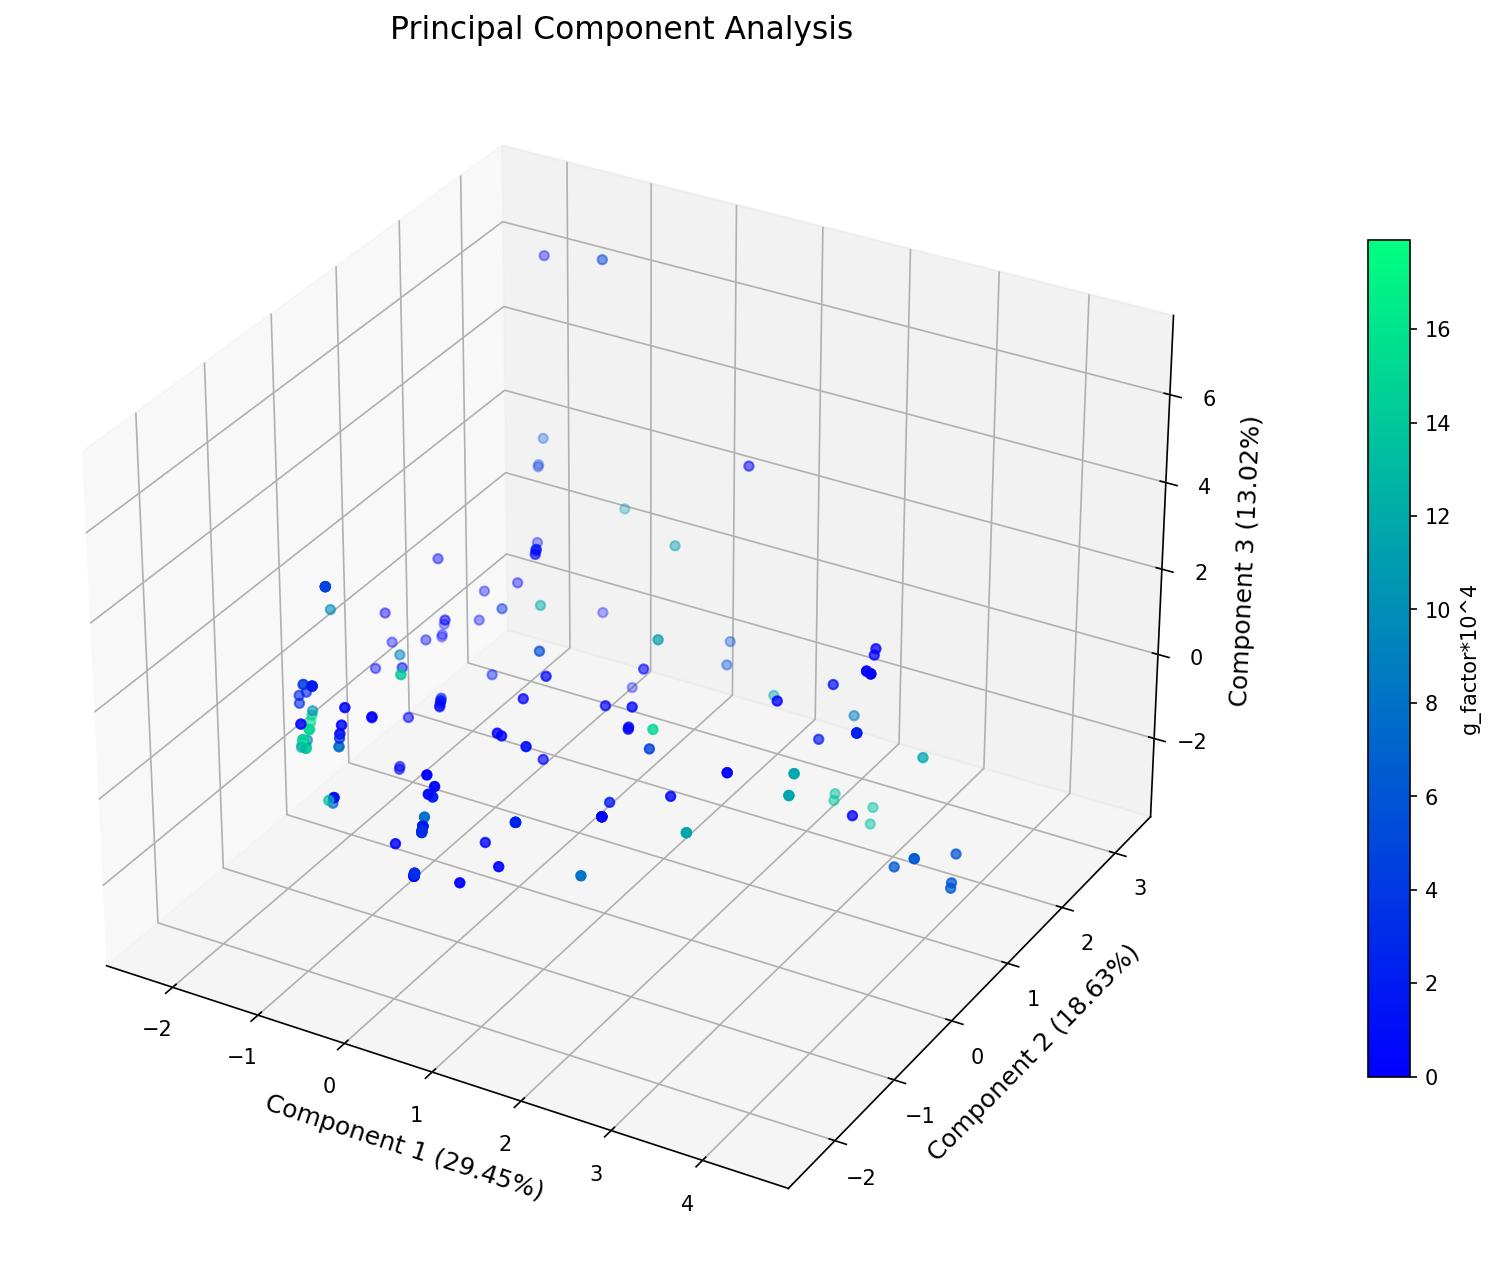

In [7]:
fig = plt.figure(figsize=(12, 12),dpi=150)
plt.style.use('default')
ax = fig.add_subplot(projection='3d')
cax=ax.scatter(X_pca[:,0] , X_pca[:,1] , X_pca[:,2], marker='o', c=df['g_factor*10^4'], cmap='winter')
plt.colorbar(cax, label='g_factor*10^4',fraction = 0.03, pad = 0.1)
ax.set_title('Principal Component Analysis',size=15)
#ax.set(xlabel='Component 1 (29.45%)',ylabel='Component 2 (18.63%)',zlabel='Component 3 (13.02%)')
fz = 12
ax.set_xlabel('Component 1 (29.45%)', fontsize=fz)
ax.set_ylabel('Component 2 (18.63%)', fontsize=fz)
ax.set_zlabel('Component 3 (13.02%)', fontsize=fz)
fig.savefig('PCA.svg',dpi=150,format='svg')

[Text(0.5, 0, 'component2'), Text(0, 0.5, 'component3')]

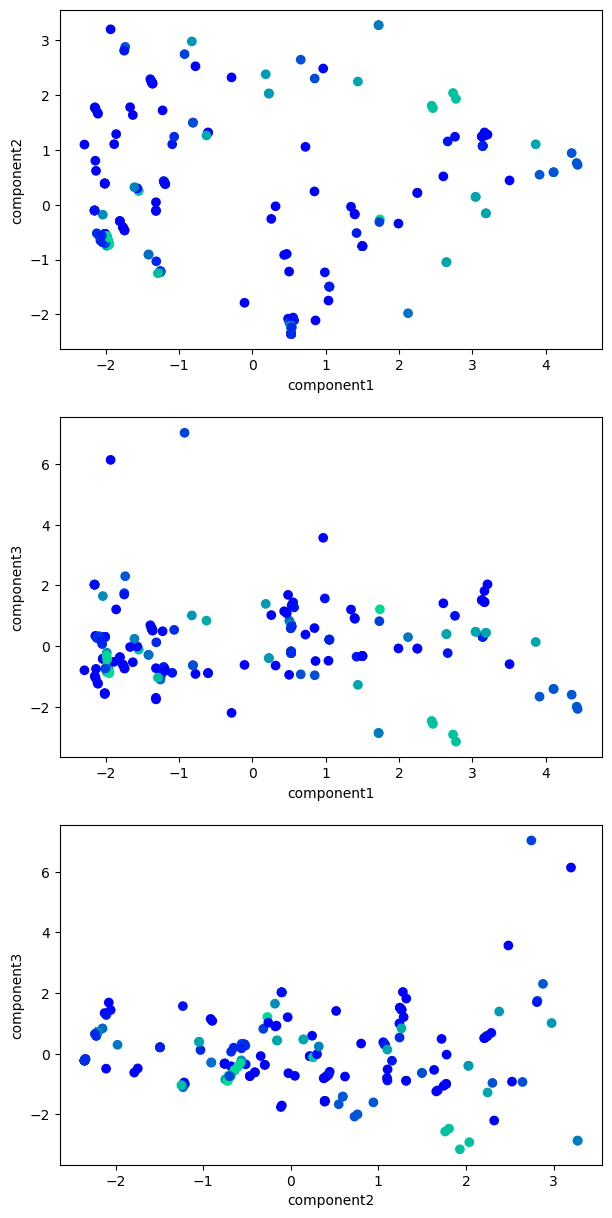

In [8]:
fig,(ax1,ax2,ax3) = plt.subplots(3,1 ,figsize=(7,15))
plt.style.use('default')

ax1.scatter(X_pca[:,0] , X_pca[:,1] ,marker='o', c=df['g_factor*10^4'], cmap='winter')
ax1.set(xlabel='component1',ylabel='component2')

ax2.scatter(X_pca[:,0] , X_pca[:,2] ,marker='o', c=df['g_factor*10^4'], cmap='winter')
ax2.set(xlabel='component1',ylabel='component3')

ax3.scatter(X_pca[:,1] , X_pca[:,2] ,marker='o', c=df['g_factor*10^4'], cmap='winter')
ax3.set(xlabel='component2',ylabel='component3')

In [9]:

X_pdf=pd.DataFrame(X_pca)
ind=pd.DataFrame({'index':range(202)})
X_pdf=pd.concat([ind,X_pdf],axis=1)

#region1
re1 = X_pdf[(X_pdf[0] <= -1.9) & (X_pdf[0] >= -2.0) & (X_pdf[1] <= -0.5) & (X_pdf[1] >= -1.0 ) & (X_pdf[2] <= 0) & (X_pdf[2] >= -1 )]

#region2
re2 = X_pdf[(X_pdf[0] <= 3) & (X_pdf[0] >= 2) & (X_pdf[2] <= -2) & (X_pdf[2] >= -4 ) ]

#region3
re3 = X_pdf[(X_pdf[0] <= 4) & (X_pdf[0] >= 2) & (X_pdf[1] <= 4) & (X_pdf[1] >= 0)]

#region4
re4 = X_pdf[(X_pdf[0] <= 0) & (X_pdf[0] >= -1) & (X_pdf[1] <= 2) & (X_pdf[1] >= -1 )]


print(re2)

    index         0         1         2
71     71  2.445532  1.806665 -2.466469
72     72  2.462171  1.762396 -2.562736
73     73  2.777303  1.930562 -3.147979
74     74  2.736771  2.038396 -2.913484
